In [1]:
import sympy

from einsteinpy.symbolic import GenericSpacetime, GenericVector, MetricTensor
from einsteinpy.symbolic.predefined import Schwarzschild

sympy.init_printing()

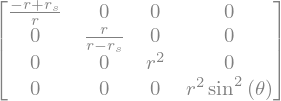

In [2]:
t, r, theta, phi = sympy.symbols(r"t r \theta \phi")
r_s = sympy.Symbol("r_s")
g = sympy.diag(-(1-r_s/r), 1/(1-r_s/r), r**2, r**2 *sympy.sin(theta)**2)
g = MetricTensor(g.tolist(), syms=[t,r,theta,phi], config='ll')


g.tensor()

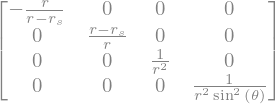

In [3]:
g.inv().tensor()

In [4]:
st = GenericSpacetime(g)
for s in dir(st):
    if not s.startswith('_'):
        print(s)

BelRobinsonTensor
ChristoffelSymbols
EinsteinTensor
LeviCivitaTensor
Metric
RicciScalar
RicciTensor
RiemannTensor
SEMTensor
WeylTensor
covariant_derivative
geodesic_equation


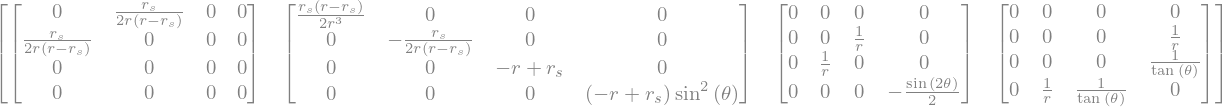

In [5]:
st.ChristoffelSymbols.tensor()

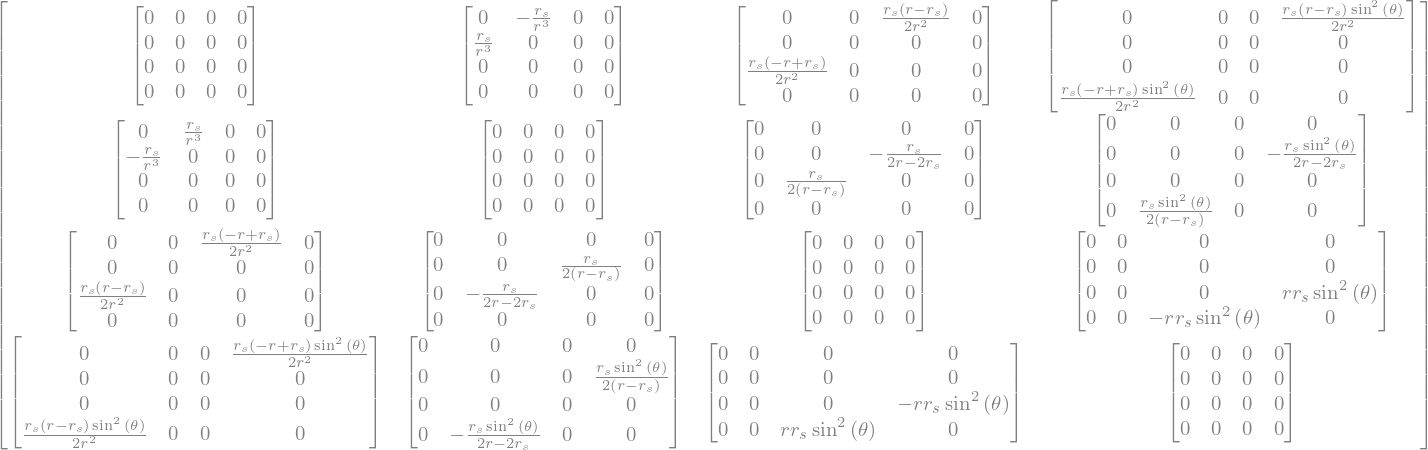

In [6]:
# The tensors needed along the way are saved, so calculating the Weyl tensor... 

st.WeylTensor.tensor()

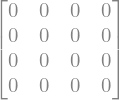

In [7]:
# ... also gives the Ricci tensor on the way
st.RicciTensor.tensor()

### Dual Tensor

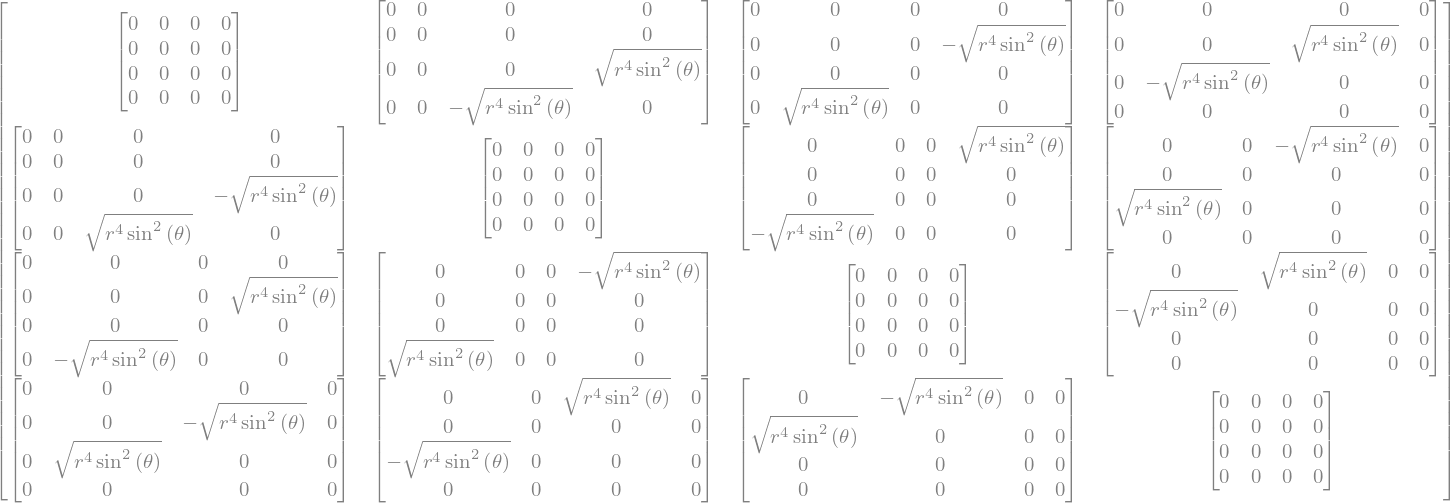

In [8]:
# The spacetime also has the alternating Levi-Civita tensor
st.LeviCivitaTensor.tensor()

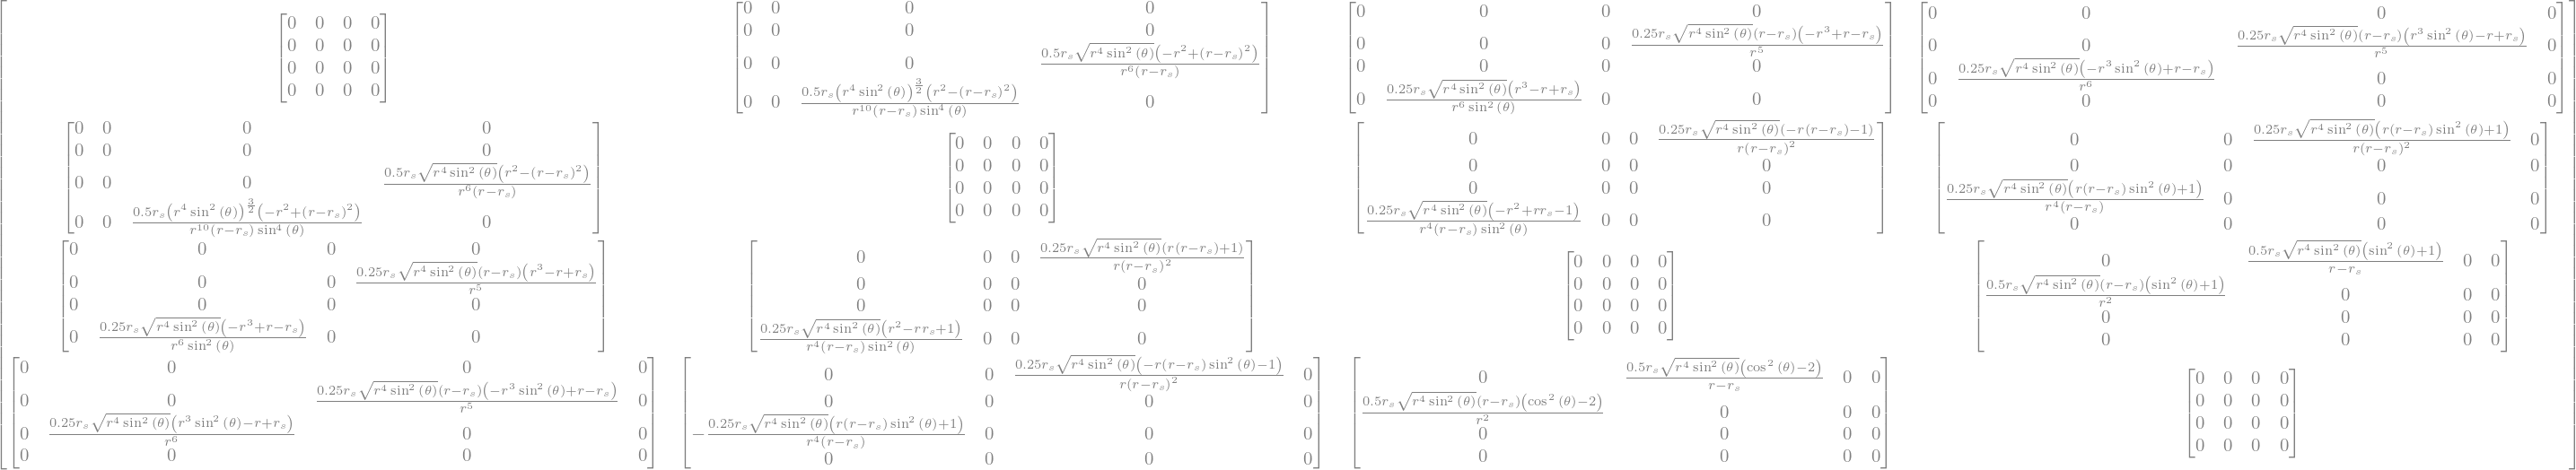

In [9]:
# which allows the dual tensor to be easily calculated
st.WeylTensor.DualTensor.tensor()

### Geodesic Equation

In [10]:
lam = sympy.symbols("\\lambda")
x_t = sympy.Function("x_t")(lam)
x_r = sympy.Function("x_r")(lam)
x = GenericVector([x_t, x_r,0,0], syms=g.symbols(), config="l", parent_metric=g)
x.tensor()

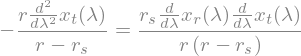

In [11]:
ge = st.geodesic_equation(x, lam)

sympy.Eq(ge.lhs[0], ge.rhs[0])

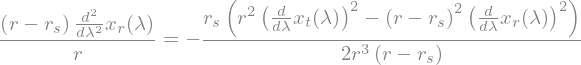

In [12]:
sympy.Eq(ge.lhs[1], ge.rhs[1])

### Covariant derivative

In [13]:
n = GenericVector([(r/(r-r_s)), 0, 0,0], syms=g.symbols(), config="l", parent_metric=g)
n.tensor()

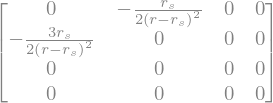

In [14]:
# Calculates the covariant derivative of vectors, ..
st.covariant_derivative(n).tensor()

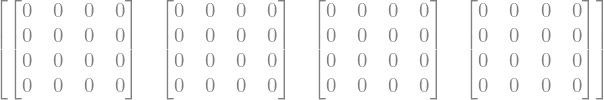

In [15]:
# tensors,..
st.covariant_derivative(g).tensor()

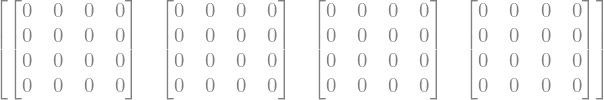

In [16]:
st.covariant_derivative(g.inv()).tensor()

In [17]:
# or scalars
Phi = sympy.Function("\\Phi", real=True)(t, r)
st.covariant_derivative(Phi).tensor()